In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)

y = df.iloc[:, 0]   # Year
X = df.iloc[:, 1:]  # Features

DF:(252175, 91)


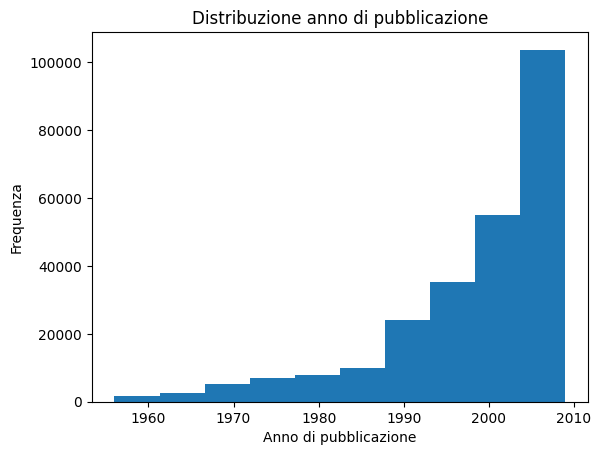

DF DROP:(196925, 91)


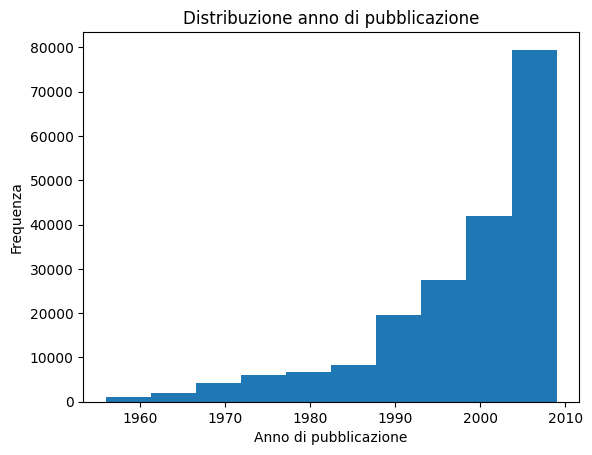

In [2]:

# Min-Max Normalization
min_max_scaler = MinMaxScaler()
df_normalized = min_max_scaler.fit_transform(X)


from scipy.stats import zscore

# Identify and remove outliers using Z-score
z_scores = zscore(df_normalized)
df_no_outliers =df[(z_scores < 3).all(axis=1)]

print(f'DF:{df.shape}')


y = df_no_outliers.iloc[:, 0]   # Year
X = df_no_outliers.iloc[:, 1:]  # Features

plt.hist(df['Year'])
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione anno di pubblicazione')
plt.show()


print(f'DF DROP:{df_no_outliers.shape}')


plt.hist(y)
plt.xlabel('Anno di pubblicazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione anno di pubblicazione')
plt.show()




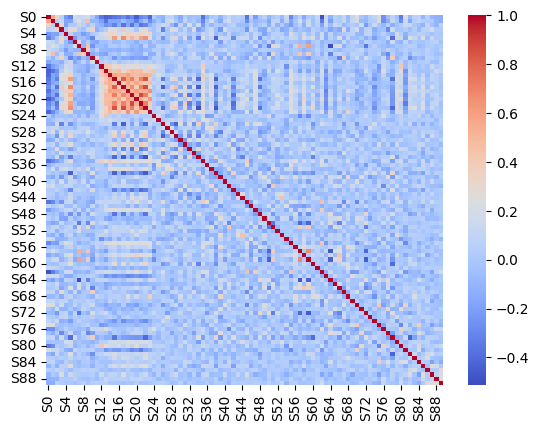

In [3]:
import seaborn as sns

correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd


# Dividi il dataset in set di addestramento e di test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converte i dati in tensori PyTorch
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Crea oggetti DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
# Aggiungi uno scheduler per ridurre dinamicamente il tasso di apprendimento


# Definisci la rete neurale
class ImprovedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.5):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Inizializza la rete, la funzione di perdita e l'ottimizzatore
input_size = x_train.shape[1]  # Assumendo che x_train abbia più di una feature
hidden_size = 64  # Modifica la dimensione nascosta a seconda delle tue esigenze
output_size = 1
model = ImprovedNN(input_size, hidden_size, output_size, dropout_prob=0.5)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Modifica l'ottimizzatore se necessario (es. SGD)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, patience=5, verbose=True)

# Addestra il modello
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Aggiorna lo scheduler sulla base del valore di loss
    scheduler.step(loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Calcola e stampa il MSE sul set di test
model.eval()
test_mse = 0.0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        test_mse += criterion(outputs, targets).item()

average_test_mse = test_mse / len(test_loader)
print(f'Average Test MSE: {average_test_mse}')


NameError: name 'optimizer' is not defined